# Introduction
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

# Data Gathering/Extraction

In [1]:
#import necessary libraries
import requests
import zipfile
#run 'pip install kaggle' to run kaggle api
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd

### Get data using Kaggle API

In [2]:
#from Kaggle API documentation
api = KaggleApi()
api.authenticate()

In [3]:
#test run API
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         68           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         95           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        883           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge        149           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1273           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14293           False  


In [4]:
api.competition_download_files('spaceship-titanic', path='./')

In [5]:
#competition files are zipped
#to unzip file
with zipfile.ZipFile('spaceship-titanic.zip', 'r') as zip_ref:
    zip_ref.extractall("C:/Users/Favour/Documents/PYTHON FILES/train_data Pipeline") #save in filepath

**Use `pd.read_csv` to view what has been downloaded**

In [6]:
pd.read_csv('test.csv').head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [7]:
pd.read_csv('sample_submission.csv').head(3)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True


In [8]:
pd.read_csv('train.csv').head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


# Data Cleaning

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [10]:
train_data = pd.read_csv('train.csv')

In [11]:
train_data.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


Getting info on train_dataset

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Handling null values instead of dropping**

In [15]:
# Home Planet
HP_fill = train_data['HomePlanet'].value_counts().index[0]
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(HP_fill)

In [16]:
train_data['CryoSleep'] = train_data['CryoSleep'].fillna('False')

In [17]:
train_data[['Deck','Number','Side']] = train_data['Cabin'].apply(lambda x: pd.Series(str(x).split("/")))

train_data.drop(['Number'],axis=1, inplace=True)

#deck
deck_fill = train_data['Deck'].value_counts().index[0]
train_data['Deck'] = train_data['Deck'].fillna(deck_fill)


#side
side_fill = train_data['Side'].value_counts().index[0]
train_data['Side'] = train_data['Side'].fillna(side_fill)

In [18]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


In [19]:
destination_fill = train_data['Destination'].value_counts().index[0]
train_data['Destination'] = train_data['Destination'].fillna(destination_fill)

In [20]:
train_data['VIP'] = train_data['VIP'].fillna('False')

In [21]:
train_data['Name'] = train_data['Name'].fillna('None')

In [22]:
train_data.fillna(train_data.mean(numeric_only=True).round(1), inplace=True)

In [23]:
#Changing train_datatype of CryoSleep and VIP
train_data['CryoSleep'] = train_data['CryoSleep'].astype('bool')
train_data['VIP'] = train_data['VIP'].astype('bool')

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   object 
 15  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(7)
memory usage: 908.5+ KB


## Exploratory Data Analysis

In [25]:
#Checking correlation
train_data.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.072941,-0.050342,-0.240852,-0.202540,-0.205611,-0.196949,-0.190670,0.451744
Age,-0.072941,1.000000,0.058411,0.067616,0.127938,0.032660,0.120991,0.099211,-0.074249
VIP,-0.050342,0.058411,1.000000,0.050345,0.088525,-0.001092,0.037249,0.086757,-0.024602
RoomService,-0.240852,0.067616,0.050345,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,-0.202540,0.127938,0.088525,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,-0.205611,0.032660,-0.001092,0.052962,-0.013934,1.000000,0.013678,-0.007190,0.010019
Spa,-0.196949,0.120991,0.037249,0.009925,0.220587,0.013678,1.000000,0.147956,-0.218791
VRDeck,-0.190670,0.099211,0.086757,-0.019207,0.224275,-0.007190,0.147956,1.000000,-0.204825
Transported,0.451744,-0.074249,-0.024602,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000


In [26]:
train_data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

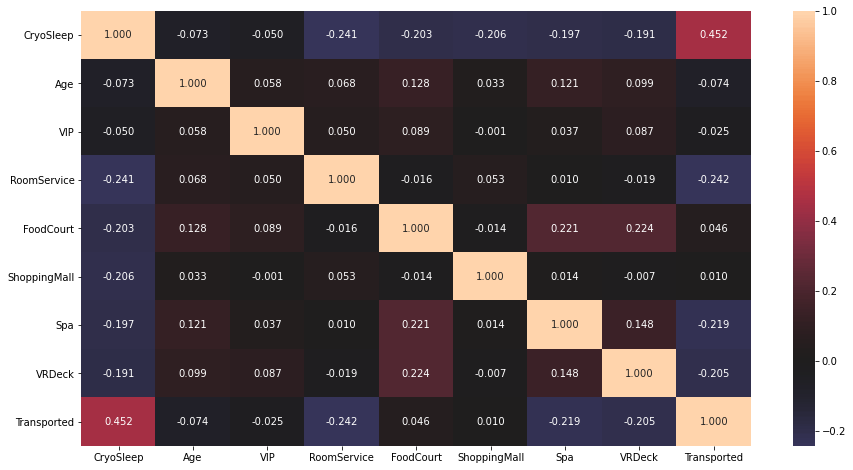

In [27]:
#using heatmap to builda correlation matrix
plt.figure(figsize=[15,8])
sns.heatmap(train_data.corr(), annot=True, fmt ='.3f', center=0);

### HomePlanet
1. Where are most passengers from?
2. Transportation status of passengers based on their home planet
3. Destination of passengers based on their home planet
4. Age range of those mostly embarking on this journey in different home planets

In [28]:
#making a categorical data type
homeplanet = ['Earth','Europa','Mars']
homeplanet_cat = pd.api.types.CategoricalDtype(ordered=True, categories=homeplanet)
train_data['HomePlanet'] = train_data['HomePlanet'].astype(homeplanet_cat)

In [29]:
train_data['HomePlanet'].dtype

CategoricalDtype(categories=['Earth', 'Europa', 'Mars'], ordered=True)

**1) Where are most passengers from?**

In [30]:
homeplanet = train_data['HomePlanet'].value_counts().rename_axis('Destination').reset_index(name='Count')

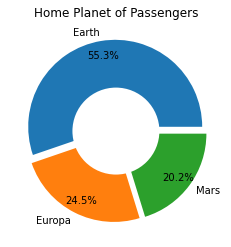

In [31]:
explode = (0.05,0.05,0.05)
plt.pie(data=homeplanet, x='Count', labels='Destination', autopct='%1.1f%%', pctdistance=0.84, explode=explode)
center_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Home Planet of Passengers');

**2) Transportation Status for different home planet**

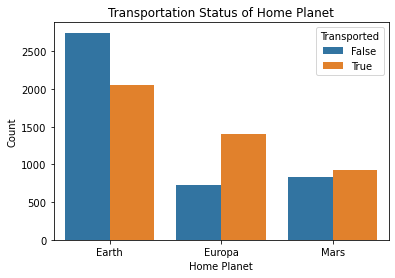

In [32]:
#Using seaborn countplot
sns.countplot(data = train_data, x='HomePlanet', hue='Transported')
plt.title("Transportation Status of Home Planet")
plt.xlabel('Home Planet')
plt.ylabel('Count');

From the plot it shows more travels have been made from earth than other planets but Europa had more successful travel than failed travel, same as Mars but with a very slim gap.

**3) Destination of passengers from different home planets**

In [33]:
train_data['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [34]:
# making a categorical train_data type
destination = ['TRAPPIST-1e','55 Cancri e','PSO J318.5-22']
destination_cat = pd.api.types.CategoricalDtype(ordered=True, categories=destination)
train_data['Destination'] = train_data['Destination'].astype(destination_cat)

In [35]:
train_data['Destination'].dtype

CategoricalDtype(categories=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], ordered=True)

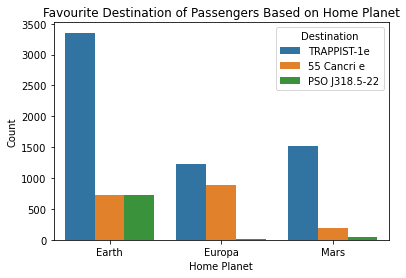

In [36]:
sns.countplot(data=train_data, x='HomePlanet', hue='Destination')
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Favourite Destination of Passengers Based on Home Planet');

The favourite destination of passsengers is TRAPPIST-1e for all home planets followed by 55 Cancri-e but those from Europa travel to 55 Cancri-e more than those from Earth. 

**4) Age range of those embarking on this journey in different planets**

First of I will be creating a new column titled `Age group` that has the range of values for the ages but before that for ages with 0, I will cap all ages stated as 0 to 1 as one cannot be "0 years old"

|Age Group | Age Range | 
| -------- | --------- |
| Toddler  |   0-4     |
| Kids     |   5-12    |
|Teen      |  13-19    |
|Youth     |  20-30    |
|Young Adult | 31-40   |
|Adult     |41-60|
|Elderly |60 and above |

**Creating `Age Group` column**

In [37]:
train_data.loc[train_data['Age'].between(0,4), 'AgeGroup'] = 'Toodler'
train_data.loc[train_data['Age'].between(5,12), 'AgeGroup'] = 'Kids'
train_data.loc[train_data['Age'].between(13,19), 'AgeGroup'] = 'Teens'
train_data.loc[train_data['Age'].between(20,30), 'AgeGroup'] = 'Youth'
train_data.loc[train_data['Age'].between(31,40), 'AgeGroup'] = 'Young Adult'
train_data.loc[train_data['Age'].between(41,60), 'AgeGroup'] = 'Adult'
train_data.loc[train_data['Age']>= 61, 'AgeGroup'] = 'Elderly'

In [38]:
train_data = train_data[['PassengerId','HomePlanet', 'CryoSleep', 'Cabin', 'Deck','Side','Destination', 'Age','AgeGroup', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck', 'Name','Transported']]

In [39]:
train_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,Young Adult,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,S,TRAPPIST-1e,24.0,Youth,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,A,S,TRAPPIST-1e,58.0,Adult,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [40]:
#making `AgeGroup` a categorical train_data type
age_group = ['Toodler','Kids','Teens','Youth','Young Adult', 'Adult', 'Elderly']
age_group_cat = pd.api.types.CategoricalDtype(ordered=True, categories=age_group)
train_data['AgeGroup'] = train_data['AgeGroup'].astype(age_group_cat)

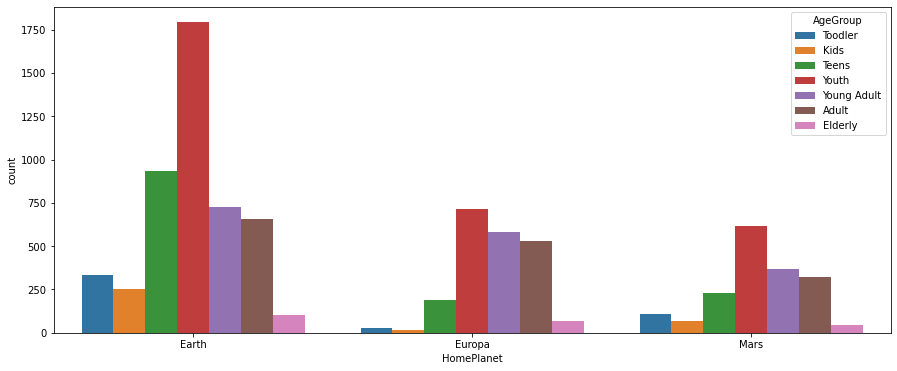

In [41]:
plt.figure(figsize=[15,6])
sns.countplot(data=train_data, x='HomePlanet', hue='AgeGroup');

From all three planets the Youths(20-30) embark on this journey the most.

### Cryosleep
Cryosleep is the process of low-temperature preservation of a human body, hoping that one day it can be restored to life.
1. Is Cryosleep a popular choice?
2. How many passengers who were elected for cryosleep were successfully transported?
3. Which homeplanet were elected for Cryosleep the most?
4. Which age range is most elected for cryosleep?
5. Which destination required cryosleep the most

**1) Is Cryosleep a popular choice?**

In [42]:
cryo = train_data['CryoSleep'].value_counts().rename_axis('CryoSleep').reset_index(name='Count')
cryo

,CryoSleep,Count
0,False,5439
1,True,3254


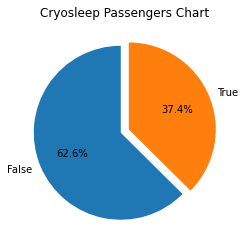

In [43]:
plt.pie(data=cryo, x='Count', labels='CryoSleep', autopct='%1.1f%%', explode=(0.05,0.05), startangle=90)
plt.title('Cryosleep Passengers Chart');

Not many people were elected for Cryosleep

**2) Transportation status of passengers elected for cryosleep**

**annotate with percentage

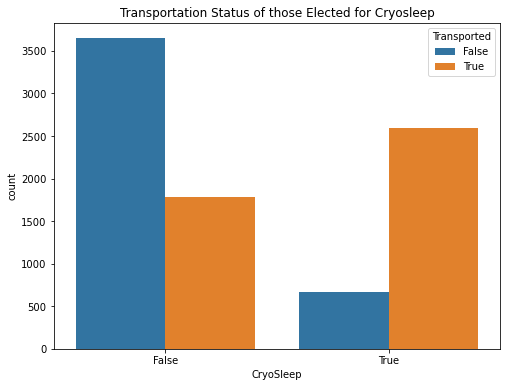

In [44]:
plt.figure(figsize=[8,6])
cry = sns.countplot(data=train_data, x='CryoSleep', hue='Transported')
plt.title('Transportation Status of those Elected for Cryosleep');

**3) Homeplanet with the most cryosleep passengers**

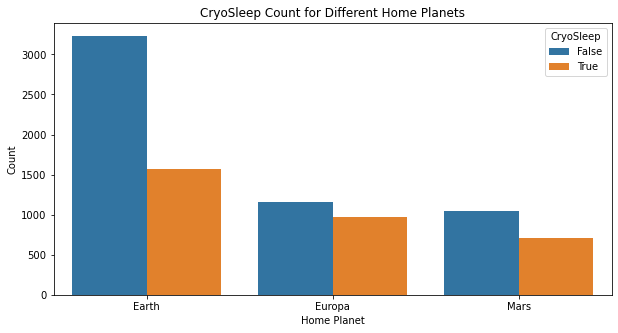

In [45]:
plt.figure(figsize=[10,5])
sns.countplot(data=train_data, x='HomePlanet', hue='CryoSleep')
plt.title('CryoSleep Count for Different Home Planets')
plt.ylabel('Count')
plt.xlabel('Home Planet');

**4) Age range common for Cryosleep**

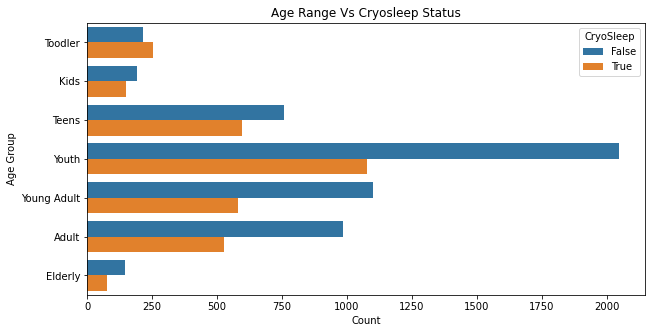

In [46]:
plt.figure(figsize=[10,5])
sns.countplot(data=train_data, y='AgeGroup', hue='CryoSleep')
plt.title('Age Range Vs Cryosleep Status')
plt.ylabel('Age Group')
plt.xlabel('Count');

Adult>Young Adult>Teens>Youths>Toodler>Kids>Elderly

**5) Percentage of those elected for cryosleep based on destination**

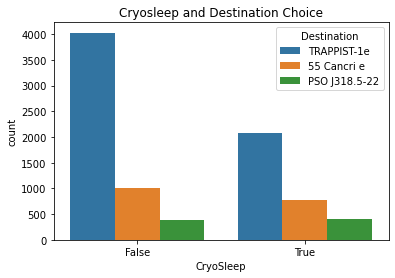

In [47]:
sns.countplot(data=train_data, x='CryoSleep', hue='Destination')
plt.title('Cryosleep and Destination Choice');

### Cabin
1. Which side of the deck had more people
2. Is there a particular side of the deck for those in cryosleep
3. Age distribution for each deck
4. Are people from the same home planet restricted to a particular deck or side of the spaceship?
5. Or are people going to the same destinatination restricted to one side of the deck or side of the spaceship?
6. Transporation status based on deck

To achieve this we will split the cabin column to get only the side of the ship either the port and starboard which refer to the left and right sides

**1) Which deck and side is more populated**

In [48]:
train_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,Young Adult,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,S,TRAPPIST-1e,24.0,Youth,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [49]:
#let's make a Deck a categorical train_datatype
deck = ['A','B','C','D','E','F','G','T']
deck_cat = pd.api.types.CategoricalDtype(ordered=True, categories=deck)
train_data['Deck'] = train_data['Deck'].astype(deck_cat)

In [50]:
#make side a categorical train_datatype
side = ['P','S']
side_cat = pd.api.types.CategoricalDtype(ordered=True, categories=side)
train_data['Side'] = train_data['Side'].astype(side_cat)

In [51]:
side = train_data['Side'].value_counts().rename_axis('Side').reset_index(name='Count')
side

,Side,Count
0,S,4487
1,P,4206


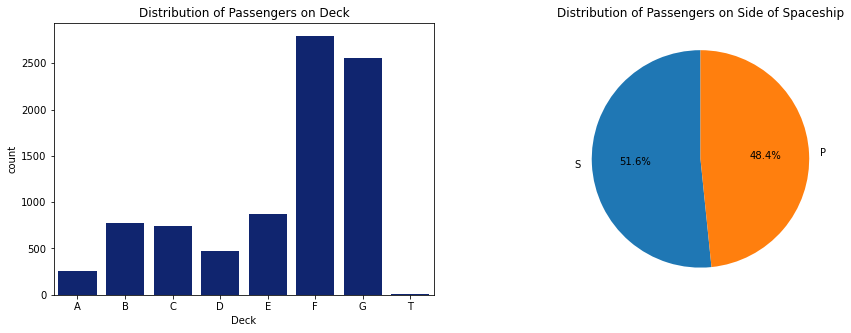

In [52]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
color = sns.color_palette('dark')[0]
sns.countplot(data=train_data, x='Deck', color=color)
plt.title('Distribution of Passengers on Deck')

plt.subplot(1,2,2)
plt.pie(x=side['Count'], labels=side['Side'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers on Side of Spaceship');

* S representing Starboard
* P representing Port

**2) Which deck and side has more cryosleep passengers**

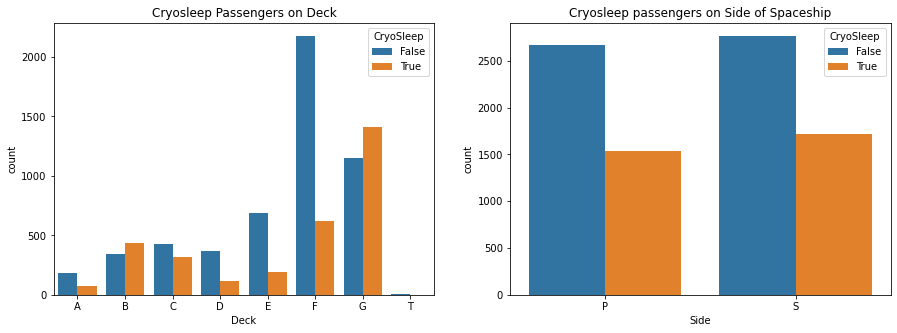

In [53]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=train_data, x='Deck', hue='CryoSleep')
plt.title('Cryosleep Passengers on Deck')


plt.subplot(1,2,2)
sns.countplot(data=train_data, x='Side', hue='CryoSleep')
plt.title('Cryosleep passengers on Side of Spaceship');

**3) Age distrubtion on each deck**

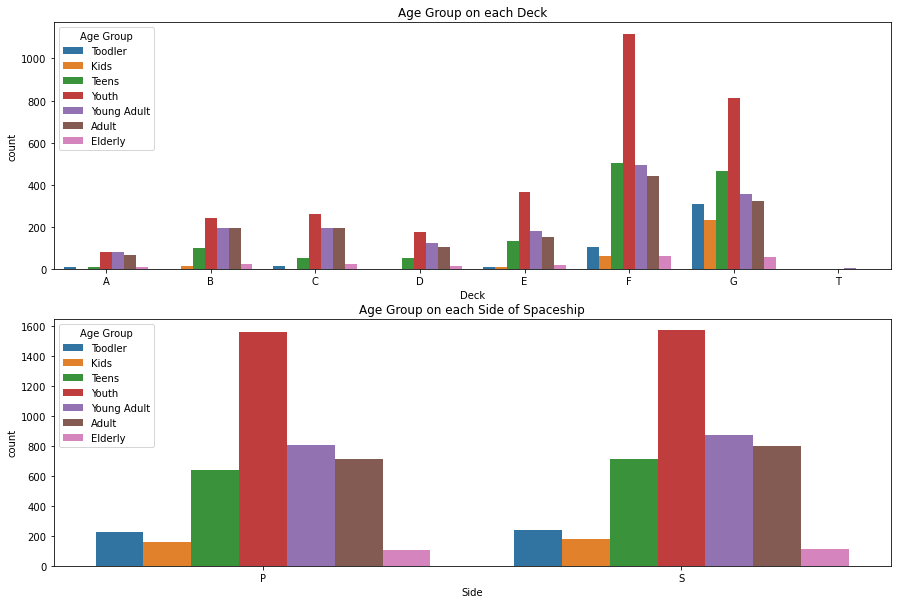

In [54]:
plt.figure(figsize=[15,10])
plt.subplot(2,1,1)
sns.countplot(data=train_data, x='Deck', hue='AgeGroup')
plt.title('Age Group on each Deck')
plt.legend(title='Age Group')

plt.subplot(2,1,2)
sns.countplot(data=train_data, x='Side', hue='AgeGroup')
plt.title('Age Group on each Side of Spaceship')
plt.legend(title='Age Group');

Same distribution

**4) Are people from the same Home Planet restricted to the same deck or side?**

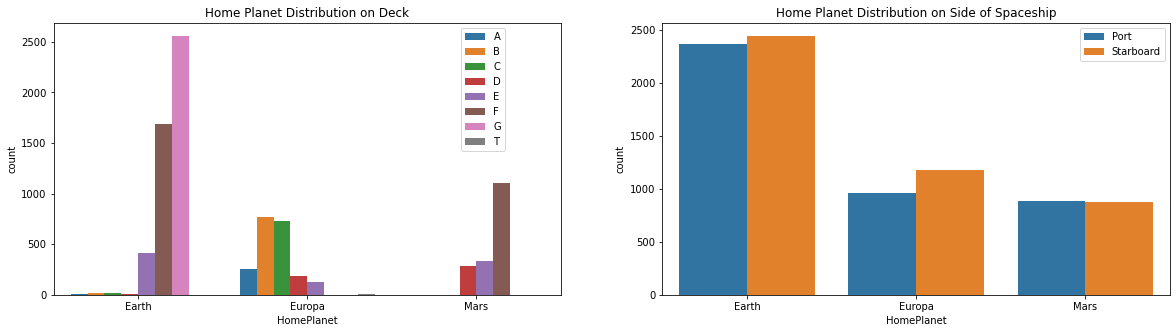

In [55]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.countplot(data=train_data, x='HomePlanet', hue='Deck')
ax=plt.gca()
plt.legend(bbox_to_anchor=(0.9,1.0), bbox_transform=ax.transAxes)
plt.title('Home Planet Distribution on Deck')

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='HomePlanet', hue='Side')
plt.title('Home Planet Distribution on Side of Spaceship')
plt.legend(('Port','Starboard'));

**5) Are people going to the same destination restricted to the same deck or side?**

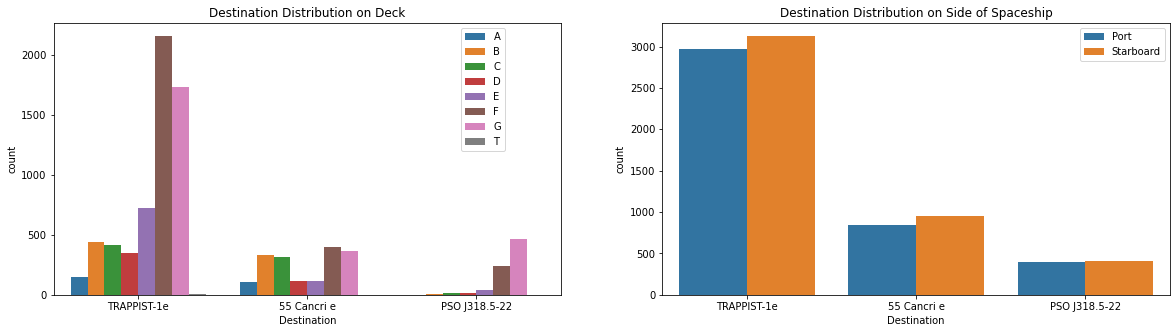

In [56]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.countplot(data=train_data, x='Destination', hue='Deck')
ax=plt.gca()
plt.legend(bbox_to_anchor=(0.9,1.0), bbox_transform=ax.transAxes)
plt.title('Destination Distribution on Deck')

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='Destination', hue='Side')
plt.title('Destination Distribution on Side of Spaceship')
plt.legend(('Port','Starboard'));

**6) Transportation Status based on Deck and Side**

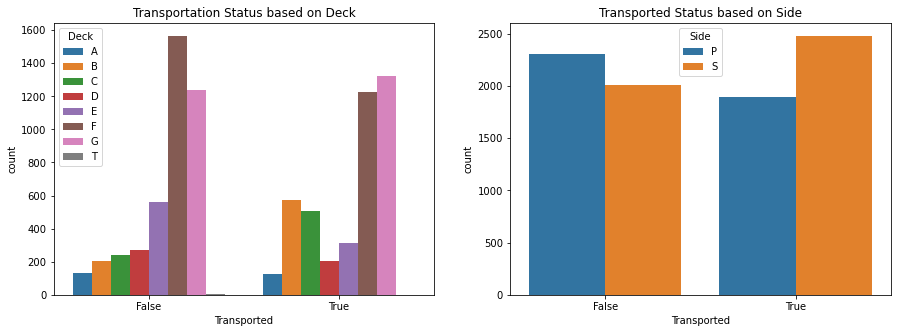

In [57]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=train_data, x='Transported', hue='Deck')
plt.title('Transportation Status based on Deck')

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='Transported', hue='Side')
plt.title('Transported Status based on Side');

### Destination

1. Destination distribution
2. Destination visited by age group
3. Which destination has successful transportation

**1) Destination distribution**

In [58]:
dest = train_data['Destination'].value_counts().rename_axis('Destination').reset_index(name='Count')

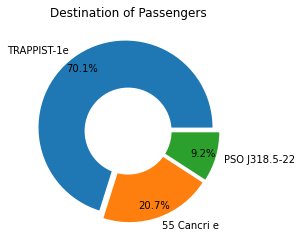

In [59]:
explode = (0.05,0.05,0.05)
plt.pie(data=dest, x='Count', labels='Destination', autopct='%1.1f%%', pctdistance=0.85, explode=explode)
center_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Destination of Passengers');

**2) Age Group and Destination**

<AxesSubplot:xlabel='Destination', ylabel='count'>

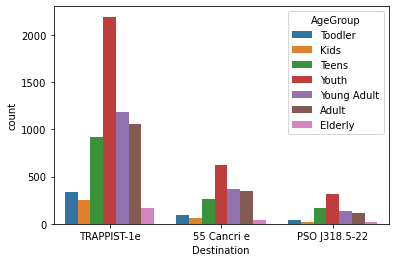

In [60]:
sns.countplot(data=train_data, x='Destination', hue='AgeGroup')

**3) Destination transportation status**

<AxesSubplot:xlabel='Destination', ylabel='count'>

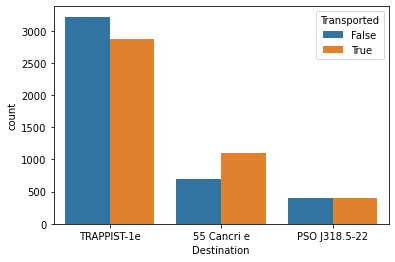

In [61]:
sns.countplot(data=train_data, x='Destination', hue='Transported')

### Age
1. Age group that has most succesful transportation

**1) Age Group with most successful transportation**

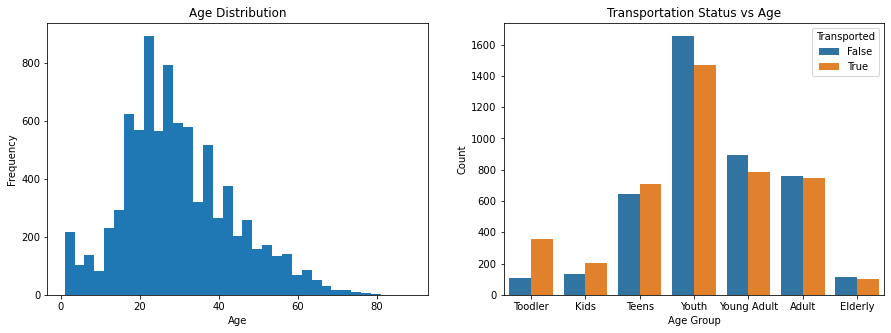

In [62]:
bins = np.arange(1, train_data['Age'].max()+10, 2.5)

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.hist(data=train_data, x='Age', bins=bins)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='AgeGroup', hue='Transported')
plt.title('Transportation Status vs Age')
plt.xlabel('Age Group')
plt.ylabel('Count');

### VIP
1. Percentage of passengers who paid for VIP services
2. Age group that paid for VIP services most
3. Home planet that paid for VIP services most
4. VIP and Cryosleep
5. Is VIP services common to a particular deck
6. Transportation status of those whose opted for VIP service

In [63]:
vip = train_data['VIP'].value_counts().rename_axis('VIP').reset_index(name='Count')
vip

,VIP,Count
0,False,8291
1,True,402


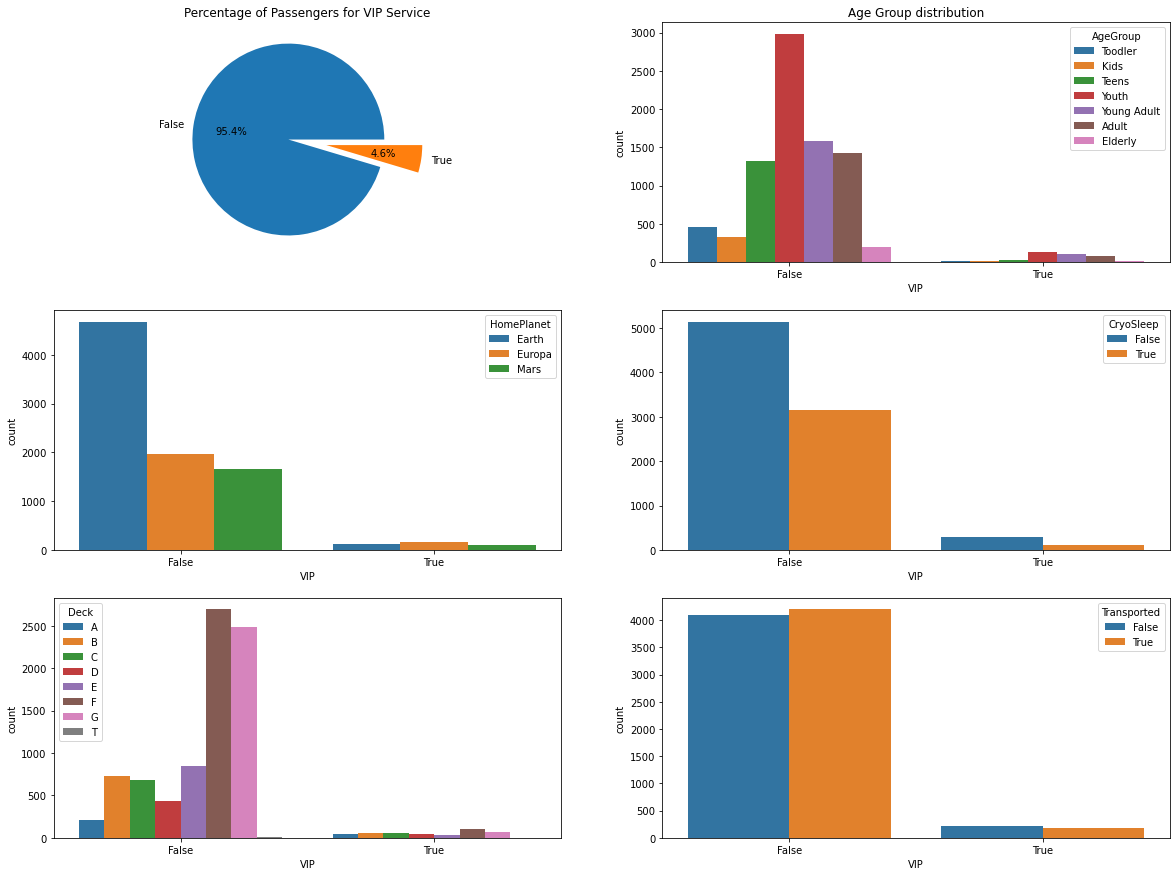

In [64]:
plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
explode = (0.2, 0.2)
plt.pie(data=vip, x='Count', labels='VIP', autopct='%1.1f%%', explode=explode)
plt.title('Percentage of Passengers for VIP Service')

plt.subplot(3,2,2)
sns.countplot(data=train_data, x='VIP', hue='AgeGroup')
plt.title('Age Group distribution')

plt.subplot(3,2,3)
sns.countplot(data=train_data, x='VIP', hue='HomePlanet')

plt.subplot(3,2,4)
sns.countplot(data=train_data, x='VIP', hue='CryoSleep')

plt.subplot(3,2,5)
sns.countplot(data=train_data, x='VIP', hue='Deck')

plt.subplot(3,2,6)
sns. countplot(data=train_data, x='VIP', hue='Transported');

Well not many paid for VIP treatment

### Luxury Amenities

In [65]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827355,224.687875,458.077683,173.728471,311.137962,304.855769
std,14.339055,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [66]:
train_data.query('VRDeck >=16000')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
725,0768_01,Europa,False,B/32/P,B,P,55 Cancri e,36.0,Young Adult,False,29.0,12180.0,0.0,93.0,17306.0,Maiam Oilloody,False
3366,3619_01,Europa,False,B/114/P,B,P,TRAPPIST-1e,36.0,Young Adult,False,43.0,2.0,0.0,14.0,16337.0,Tauva Roureed,False
4311,4594_02,Europa,False,C/144/P,C,P,TRAPPIST-1e,31.0,Young Adult,False,0.0,6670.0,217.0,625.0,20336.0,Tabiton Folhal,False
5619,5977_02,Europa,False,B/230/S,B,S,55 Cancri e,57.0,Adult,False,200.0,9.0,0.0,311.1,24133.0,None,False
6547,6908_01,Europa,False,C/254/S,C,S,TRAPPIST-1e,60.0,Adult,False,0.0,960.0,46.0,854.0,17074.0,Sheleon Swinvul,False


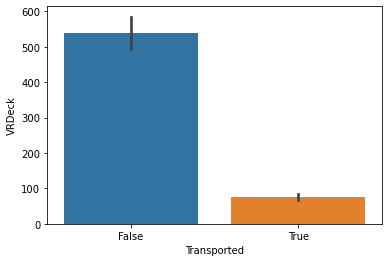

In [67]:
sns.barplot(data=train_data, x='Transported', y='VRDeck');

In [68]:
train_data.query('ShoppingMall<=50')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,Young Adult,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,S,TRAPPIST-1e,24.0,Youth,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,A,S,TRAPPIST-1e,58.0,Adult,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
5,0005_01,Earth,False,F/0/P,F,P,PSO J318.5-22,44.0,Adult,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,F,S,TRAPPIST-1e,26.0,Youth,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,9275_03,Europa,True,A/97/P,A,P,TRAPPIST-1e,30.0,Youth,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,A,P,55 Cancri e,41.0,Adult,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,G,S,PSO J318.5-22,18.0,Teens,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8691,9280_01,Europa,False,E/608/S,E,S,55 Cancri e,32.0,Young Adult,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [69]:
train_data.query('ShoppingMall>=5000')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
375,0412_01,Europa,False,C/11/P,C,P,TRAPPIST-1e,60.0,Adult,False,0.0,7255.0,5952.0,1537.0,0.0,Baton Quelfly,True
385,0427_01,Europa,False,E/26/P,E,P,TRAPPIST-1e,31.0,Young Adult,False,417.0,458.1,7185.0,562.0,792.0,Algor Efulows,True
637,0665_01,Earth,False,F/141/P,F,P,TRAPPIST-1e,28.0,Youth,False,224.7,0.0,7104.0,0.0,0.0,Cineys Winie,True
1043,1112_01,Europa,False,B/39/P,B,P,55 Cancri e,40.0,Young Adult,False,0.0,4076.0,6124.0,58.0,100.0,Elebola Opshaft,True
4621,4925_01,Mars,False,F/936/S,F,S,TRAPPIST-1e,23.0,Youth,False,197.0,76.0,5635.0,7.0,0.0,Dynx Sfin,True
4724,5040_01,Europa,False,C/195/S,C,S,TRAPPIST-1e,26.0,Youth,False,0.0,21.0,10424.0,1373.0,7218.0,Enibik Dynigic,False
5137,5488_02,Europa,False,B/186/P,B,P,TRAPPIST-1e,15.0,Teens,False,0.0,22.0,6805.0,0.0,531.0,Acrabik Hoorherve,True
5673,6027_01,Europa,False,B/232/S,B,S,TRAPPIST-1e,36.0,Young Adult,False,0.0,1828.0,9058.0,1.0,2.0,Graviph Coweboded,True
5989,6340_01,Europa,False,C/195/P,C,P,TRAPPIST-1e,29.0,Youth,False,0.0,584.0,5468.0,7.0,661.0,Gacrab Pressive,True
6223,6583_01,Europa,False,B/254/S,B,S,TRAPPIST-1e,13.0,Teens,False,0.0,100.0,12253.0,6.0,80.0,Charda Sunlove,True


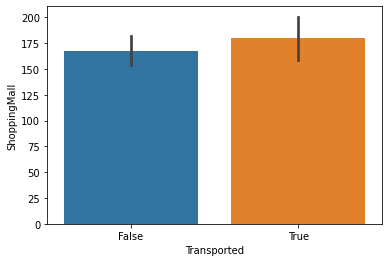

In [70]:
sns.barplot(data=train_data, x='Transported', y='ShoppingMall');

In [71]:
train_data.query('RoomService <=80')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,P,TRAPPIST-1e,39.0,Young Adult,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,A,S,TRAPPIST-1e,58.0,Adult,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,A,S,TRAPPIST-1e,33.0,Young Adult,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
5,0005_01,Earth,False,F/0/P,F,P,PSO J318.5-22,44.0,Adult,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,F,S,TRAPPIST-1e,26.0,Youth,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,9275_03,Europa,True,A/97/P,A,P,TRAPPIST-1e,30.0,Youth,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,A,P,55 Cancri e,41.0,Adult,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,G,S,PSO J318.5-22,18.0,Teens,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,G,S,TRAPPIST-1e,26.0,Youth,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [72]:
train_data.query('RoomService >=8000')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
928,0992_04,Europa,False,NaN,NaN,S,55 Cancri e,35.0,Young Adult,True,8030.0,300.0,0.0,0.0,1436.0,Naosa Herpumble,False
1177,1243_02,Europa,False,A/9/P,A,P,TRAPPIST-1e,32.0,Young Adult,False,8168.0,69.0,11.0,371.0,0.0,Geno Oderient,False
4416,4690_02,Europa,False,NaN,NaN,S,TRAPPIST-1e,27.0,Youth,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False
4762,5084_02,Europa,False,E/315/P,E,P,TRAPPIST-1e,32.0,Young Adult,False,8151.0,2052.0,1919.0,7352.0,754.0,Batrix Fuelightic,False
5105,5455_01,Mars,False,E/344/P,E,P,55 Cancri e,13.0,Teens,False,9920.0,0.0,180.0,130.0,571.0,Varkes Nate,False
5725,6066_02,Europa,False,C/226/S,C,S,55 Cancri e,55.0,Adult,False,8142.0,8.0,0.0,1481.0,0.0,Terion Mallisly,False
7118,7585_02,Europa,False,C/281/S,C,S,TRAPPIST-1e,39.0,Young Adult,True,8209.0,18.0,432.0,3560.0,54.0,Azhasim Admingried,False
7933,8470_01,Europa,True,C/281/P,C,P,55 Cancri e,31.0,Young Adult,True,8243.0,280.0,0.0,3220.0,2285.0,Brafirk Aloubtled,False
8626,9202_01,Europa,False,C/309/P,C,P,TRAPPIST-1e,26.0,Youth,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False


<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

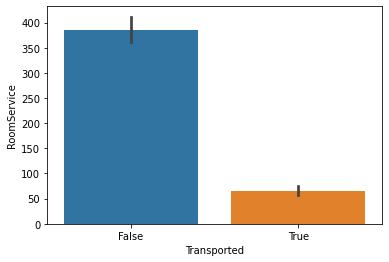

In [73]:
sns.barplot(data=train_data, x='Transported', y='RoomService')

In [74]:
train_data.query('FoodCourt >= 15000')

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
474,0510_01,Europa,False,C/16/P,C,P,TRAPPIST-1e,59.0,Adult,False,0.0,16521.0,0.0,323.0,0.0,Astrark Sinecthex,True
1213,1292_01,Europa,False,B/55/S,B,S,55 Cancri e,31.0,Young Adult,True,0.0,27723.0,3.0,202.0,3146.0,Scharab Conale,True
1496,1588_02,Europa,False,E/99/P,E,P,55 Cancri e,35.0,Young Adult,False,0.0,17394.0,0.0,724.0,0.0,Hyaduma Fullous,True
1770,1882_01,Europa,True,C/71/S,C,S,55 Cancri e,18.0,Teens,False,0.0,16263.0,72.0,0.0,15.0,Magnon Antcal,True
1842,1969_01,Europa,False,C/75/S,C,S,55 Cancri e,27.0,Youth,False,224.7,21066.0,0.0,2448.0,2293.0,Unukath Sandul,True
2067,2215_01,Europa,False,A/27/S,A,S,55 Cancri e,41.0,Adult,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True
3180,3428_02,Europa,False,C/113/P,C,P,TRAPPIST-1e,27.0,Youth,False,0.0,18481.0,0.0,2.0,3875.0,Terope Cumpting,True
3198,3444_01,Europa,False,B/131/S,B,S,55 Cancri e,33.0,Young Adult,False,0.0,27071.0,0.0,15.0,0.0,Ainoxa Scerodbox,True
3428,3699_02,Europa,False,C/123/P,C,P,55 Cancri e,25.0,Youth,True,0.0,17432.0,0.0,241.0,2102.0,Gorab Tronsive,True
3538,3796_01,Europa,False,B/121/P,B,P,55 Cancri e,33.0,Young Adult,False,90.0,26830.0,0.0,27.0,703.0,Dhena Semageary,True


<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

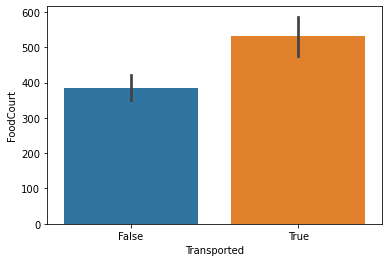

In [75]:
sns.barplot(data=train_data, x='Transported', y='FoodCourt')

## Modeling

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   category
 2   CryoSleep     8693 non-null   bool    
 3   Cabin         8494 non-null   object  
 4   Deck          8494 non-null   category
 5   Side          8693 non-null   category
 6   Destination   8693 non-null   category
 7   Age           8693 non-null   float64 
 8   AgeGroup      8693 non-null   category
 9   VIP           8693 non-null   bool    
 10  RoomService   8693 non-null   float64 
 11  FoodCourt     8693 non-null   float64 
 12  ShoppingMall  8693 non-null   float64 
 13  Spa           8693 non-null   float64 
 14  VRDeck        8693 non-null   float64 
 15  Name          8693 non-null   object  
 16  Transported   8693 non-null   bool    
dtypes: bool(3), category(5), float64(6), object(3)
memor

### One Hot Encoding
This is to make categorical variables readable by my machine

In [78]:
def get_dummy(df, col):
    result = pd.get_dummies(df[col], drop_first=True)
    return result

In [79]:
home_planet = get_dummy(train_data,'HomePlanet')
home_planet.head(5)

,Europa,Mars
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [80]:
cryosleep = get_dummy(train_data,'CryoSleep')
cryosleep.head(5)

,True
0,0
1,0
2,0
3,0
4,0


In [81]:
age = get_dummy(train_data,'AgeGroup')
age.head(5)

,Kids,Teens,Youth,Young Adult,Adult,Elderly
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [82]:
destination = get_dummy(train_data, 'Destination')
destination.head(5)

,55 Cancri e,PSO J318.5-22
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [83]:
vip = get_dummy(train_data, 'VIP')
vip.head(5)

,True
0,0
1,0
2,1
3,0
4,0


In [84]:
deck = get_dummy(train_data, 'Deck')
deck.head(5)

,B,C,D,E,F,G,T
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0


In [85]:
side = get_dummy(train_data, 'Side')
side.head(5)

,S
0,0
1,1
2,1
3,1
4,1


In [86]:
#concat
train = pd.concat([train_data,home_planet,cryosleep,age,destination,vip,deck,side], axis=1)

In [87]:
train2 = train.drop(['PassengerId','HomePlanet','CryoSleep','Cabin','Deck','Side',
           'Destination','Age','AgeGroup','VIP','Name'], axis=1)

In [88]:
train2.head(4)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,True,Kids,...,PSO J318.5-22,True,B,C,D,E,F,G,T,S
0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Training Data

In [89]:
X = train2.drop(['Transported'], axis=1)
y = train2['Transported']

In [90]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RoomService    8693 non-null   float64
 1   FoodCourt      8693 non-null   float64
 2   ShoppingMall   8693 non-null   float64
 3   Spa            8693 non-null   float64
 4   VRDeck         8693 non-null   float64
 5   Transported    8693 non-null   bool   
 6   Europa         8693 non-null   uint8  
 7   Mars           8693 non-null   uint8  
 8   True           8693 non-null   uint8  
 9   Kids           8693 non-null   uint8  
 10  Teens          8693 non-null   uint8  
 11  Youth          8693 non-null   uint8  
 12  Young Adult    8693 non-null   uint8  
 13  Adult          8693 non-null   uint8  
 14  Elderly        8693 non-null   uint8  
 15  55 Cancri e    8693 non-null   uint8  
 16  PSO J318.5-22  8693 non-null   uint8  
 17  True           8693 non-null   uint8  
 18  B       

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RoomService    8693 non-null   float64
 1   FoodCourt      8693 non-null   float64
 2   ShoppingMall   8693 non-null   float64
 3   Spa            8693 non-null   float64
 4   VRDeck         8693 non-null   float64
 5   Europa         8693 non-null   uint8  
 6   Mars           8693 non-null   uint8  
 7   True           8693 non-null   uint8  
 8   Kids           8693 non-null   uint8  
 9   Teens          8693 non-null   uint8  
 10  Youth          8693 non-null   uint8  
 11  Young Adult    8693 non-null   uint8  
 12  Adult          8693 non-null   uint8  
 13  Elderly        8693 non-null   uint8  
 14  55 Cancri e    8693 non-null   uint8  
 15  PSO J318.5-22  8693 non-null   uint8  
 16  True           8693 non-null   uint8  
 17  B              8693 non-null   uint8  
 18  C       

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [93]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=4000)

In [94]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [95]:
predictions=logmodel.predict(X)

In [96]:
logmodel.score(X_test,y_test)

0.8077276908923643

In [97]:
result = pd.DataFrame(predictions.astype(bool), columns=['Transported'])
passenger = train['PassengerId']

In [98]:
passenger.value_counts()

8717_01    1
1457_01    1
1723_01    1
1959_02    1
7544_01    1
          ..
6405_04    1
7391_01    1
7411_01    1
5353_01    1
6748_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [99]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


In [100]:
pd.concat([passenger,result], axis=1).isna().sum()

PassengerId    0
Transported    0
dtype: int64

### Test data
Following the same procedure used in train data
1. Fill null values
2. Create AgeGroup column
3. Creat Deck and Side columns
4. Change datatype to categorical
5. One hot encoding
6. Drop unneccessary columns

In [101]:
test_data = pd.read_csv('test.csv')

In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [103]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [104]:
# Home Planet
HP_fill = test_data['HomePlanet'].value_counts().index[0]
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(HP_fill)

In [105]:
test_data['CryoSleep'] = test_data['CryoSleep'].fillna('False')

In [106]:
test_data[['Deck','Number','Side']] = test_data['Cabin'].apply(lambda x: pd.Series(str(x).split("/")))

test_data.drop(['Number'],axis=1, inplace=True)

#deck
deck_fill = test_data['Deck'].value_counts().index[0]
test_data['Deck'] = test_data['Deck'].fillna(deck_fill)


#side
side_fill = test_data['Side'].value_counts().index[0]
test_data['Side'] = test_data['Side'].fillna(side_fill)

In [107]:
destination_fill = test_data['Destination'].value_counts().index[0]
test_data['Destination'] = test_data['Destination'].fillna(destination_fill)

In [108]:
test_data['VIP'] = test_data['VIP'].fillna('False')

In [109]:
test_data['Name'] = test_data['Name'].fillna('None')

In [110]:
test_data.fillna(test_data.mean(numeric_only=True).round(1), inplace=True)

In [111]:
test_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Deck              0
Side              0
dtype: int64

In [112]:
#Changing train_datatype of CryoSleep and VIP
test_data['CryoSleep'] = test_data['CryoSleep'].astype('bool')
test_data['VIP'] = test_data['VIP'].astype('bool')

In [113]:
#making a categorical data type
home_planet = ['Earth','Europa','Mars']
home_planet_cat = pd.api.types.CategoricalDtype(ordered=True, categories=home_planet)
test_data['HomePlanet'] = test_data['HomePlanet'].astype(home_planet_cat)

In [114]:
test_data.loc[test_data['Age'].between(0,4), 'AgeGroup'] = 'Toodler'
test_data.loc[test_data['Age'].between(5,12), 'AgeGroup'] = 'Kids'
test_data.loc[test_data['Age'].between(13,19), 'AgeGroup'] = 'Teens'
test_data.loc[test_data['Age'].between(20,30), 'AgeGroup'] = 'Youth'
test_data.loc[test_data['Age'].between(31,40), 'AgeGroup'] = 'Young Adult'
test_data.loc[test_data['Age'].between(41,60), 'AgeGroup'] = 'Adult'
test_data.loc[test_data['Age']>= 61, 'AgeGroup'] = 'Elderly'

In [115]:
test_data = test_data[['PassengerId','HomePlanet','CryoSleep','Cabin','Deck','Side','Destination','Age','AgeGroup',
                       'VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']]

In [116]:
#making `AgeGroup` a categorical train_data type
agegroup = ['Toodler','Kids','Teens','Youth','Young Adult', 'Adult', 'Elderly']
agegroup_cat = pd.api.types.CategoricalDtype(ordered=True, categories=agegroup)
test_data['AgeGroup'] = test_data['AgeGroup'].astype(agegroup_cat)

In [117]:
#let's make a Deck a categorical train_datatype
deck = ['A','B','C','D','E','F','G','T']
deckcat = pd.api.types.CategoricalDtype(ordered=True, categories=deck)
test_data['Deck'] = test_data['Deck'].astype(deckcat)

In [118]:
#make side a categorical train_datatype
side = ['P','S']
sidecat = pd.api.types.CategoricalDtype(ordered=True, categories=side)
test_data['Side'] = test_data['Side'].astype(sidecat)

In [119]:
test_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,G,S,TRAPPIST-1e,27.0,Youth,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,F,S,TRAPPIST-1e,19.0,Teens,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,C,S,55 Cancri e,31.0,Young Adult,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,C,S,TRAPPIST-1e,38.0,Young Adult,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,F,S,TRAPPIST-1e,20.0,Youth,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [120]:
test_data['Deck'].value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Deck, dtype: int64

In [121]:
t_home_planet = get_dummy(test_data,'HomePlanet')
t_cryosleep = get_dummy(test_data,'CryoSleep')
t_age = get_dummy(test_data,'AgeGroup')
t_destination = get_dummy(test_data, 'Destination')
t_vip = get_dummy(test_data, 'VIP')
t_deck = get_dummy(test_data, 'Deck')
t_side = get_dummy(test_data, 'Side')

In [122]:
#concat
test = pd.concat([test_data,t_home_planet,t_cryosleep,t_age,t_destination,t_vip,t_deck,t_side], axis=1)

In [123]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Side,Destination,Age,AgeGroup,VIP,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,0013_01,Earth,True,G/3/S,G,S,TRAPPIST-1e,27.0,Youth,False,...,1,0,0,0,0,0,0,1,0,1
1,0018_01,Earth,False,F/4/S,F,S,TRAPPIST-1e,19.0,Teens,False,...,1,0,0,0,0,0,1,0,0,1
2,0019_01,Europa,True,C/0/S,C,S,55 Cancri e,31.0,Young Adult,False,...,0,0,0,1,0,0,0,0,0,1
3,0021_01,Europa,False,C/1/S,C,S,TRAPPIST-1e,38.0,Young Adult,False,...,1,0,0,1,0,0,0,0,0,1
4,0023_01,Earth,False,F/5/S,F,S,TRAPPIST-1e,20.0,Youth,False,...,1,0,0,0,0,0,1,0,0,1


In [124]:
test.drop(['HomePlanet','CryoSleep','Cabin',
           'Destination','Age','AgeGroup','VIP','Name','Deck','Side'], axis=1,inplace=True)

In [125]:
test.head(5)

,PassengerId,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,Kids,...,TRAPPIST-1e,True,B,C,D,E,F,G,T,S
0,0013_01,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,0018_01,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0019_01,0.0,0.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0021_01,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0023_01,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   object 
 1   RoomService    4277 non-null   float64
 2   FoodCourt      4277 non-null   float64
 3   ShoppingMall   4277 non-null   float64
 4   Spa            4277 non-null   float64
 5   VRDeck         4277 non-null   float64
 6   Europa         4277 non-null   uint8  
 7   Mars           4277 non-null   uint8  
 8   True           4277 non-null   uint8  
 9   Kids           4277 non-null   uint8  
 10  Teens          4277 non-null   uint8  
 11  Youth          4277 non-null   uint8  
 12  Young Adult    4277 non-null   uint8  
 13  Adult          4277 non-null   uint8  
 14  Elderly        4277 non-null   uint8  
 15  PSO J318.5-22  4277 non-null   uint8  
 16  TRAPPIST-1e    4277 non-null   uint8  
 17  True           4277 non-null   uint8  
 18  B       

In [127]:
X=test.drop(['PassengerId'],axis=1)

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RoomService    4277 non-null   float64
 1   FoodCourt      4277 non-null   float64
 2   ShoppingMall   4277 non-null   float64
 3   Spa            4277 non-null   float64
 4   VRDeck         4277 non-null   float64
 5   Europa         4277 non-null   uint8  
 6   Mars           4277 non-null   uint8  
 7   True           4277 non-null   uint8  
 8   Kids           4277 non-null   uint8  
 9   Teens          4277 non-null   uint8  
 10  Youth          4277 non-null   uint8  
 11  Young Adult    4277 non-null   uint8  
 12  Adult          4277 non-null   uint8  
 13  Elderly        4277 non-null   uint8  
 14  PSO J318.5-22  4277 non-null   uint8  
 15  TRAPPIST-1e    4277 non-null   uint8  
 16  True           4277 non-null   uint8  
 17  B              4277 non-null   uint8  
 18  C       

### Prediction

In [129]:
test['Transported'] = logmodel.predict(X)

In [130]:
final = test[['PassengerId','Transported']]

In [131]:
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [132]:
final.to_csv('sample_submission.csv', index=False)